In [1]:
# Section must be included at the beginning of each new notebook. 
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
#Importing pandas
import pandas as pd
#Importing matplot pyplot library as plt
import matplotlib.pyplot as plt
#Enabling graphs
%matplotlib inline

In [3]:
#Calling data set AccidentalDrugRelatedDeaths.csv
drug = pd.read_csv('Datasets/AccidentalDrugRelatedDeathsFinal.csv')

In [4]:
#Looking the type of drug
type(drug)

pandas.core.frame.DataFrame

In [5]:
# Displaying the first 5 rows
drug.head()

,CaseNumber,Date,Year,Gender,Race,Age,age_group,Residence City,Residence State,Residence County,...,H1drocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,13-16336,11/9/2013,2013,Female,White,53,Seniors,GROTON,NaN,NEW LONDON,...,0,1,0,0,0,0,NaN,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)"
1,12-18447,12/29/2012,2012,Male,White,30,MiddleAged,WOLCOTT,NaN,NEW HAVEN,...,0,0,0,0,0,0,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)"
2,14-2758,2/18/2014,2014,Male,White,43,MiddleAged,ENFIELD,NaN,HARTFORD,...,0,1,0,0,0,0,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"
3,14-13497,9/7/2014,2014,Female,White,24,Youth,WALLINGFORD,NaN,NEW HAVEN,...,0,0,0,0,0,0,NaN,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)"
4,13-14421,10/4/2013,2013,Female,White,26,Youth,WEST HAVEN,NaN,NEW HAVEN,...,0,0,0,0,0,0,NaN,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)"


In [6]:
#Displaying the data types 
drug.dtypes

CaseNumber                object
Date                      object
Year                       int64
Gender                    object
Race                      object
Age                        int64
age_group                 object
Residence City            object
Residence State           object
Residence County          object
Death City                object
Death State               object
County                    object
Location                  object
DescriptionofInjury       object
InjuryPlace               object
ImmediateCauseA           object
Heroin                     int64
Cocaine                    int64
Fentan1l                   int64
Ox1codone                  int64
Ox1morphone                int64
EtOH                       int64
H1drocodone                int64
Benzodiazepine             int64
Methadone                  int64
Amphet                     int64
Tramad                     int64
Morphine (not heroin)      int64
Other                     object
MannerofDe

In [7]:
#identifying details of non-numerical values (objects)
drug.describe(include=['object'])

,CaseNumber,Date,Gender,Race,age_group,Residence City,Residence State,Residence County,Death City,Death State,County,Location,DescriptionofInjury,InjuryPlace,ImmediateCauseA,Other,MannerofDeath,DeathLoc
count,3041,3041,3030,3041,3041,2951,1140,3041,3041,1178,3041,3023,462,2969,3041,299,3035,3041
unique,2976,1416,2,6,5,298,13,10,194,1,9,4,35,58,1749,82,5,194
top,Dec-77,9/21/2013,Male,White,MiddleAged,HARTFORD,CT,HARTFORD,HARTFORD,CT,Hartford,Residence,Substance Abuse,Residence,Heroin Intoxication,MORPHINE,Accident,"HARTFORD, CT\n(41.765775, -72.673356)"
freq,5,8,2207,2448,1472,176,1108,898,313,1178,900,1571,228,2108,130,44,3010,313


In [8]:
#Identifying records,attributes 
drug.shape

(3041, 33)

In [9]:
#identifying missing values
drug.isnull().sum()

CaseNumber                  0
Date                        0
Year                        0
Gender                     11
Race                        0
Age                         0
age_group                   0
Residence City             90
Residence State          1901
Residence County            0
Death City                  0
Death State              1863
County                      0
Location                   18
DescriptionofInjury      2579
InjuryPlace                72
ImmediateCauseA             0
Heroin                      0
Cocaine                     0
Fentan1l                    0
Ox1codone                   0
Ox1morphone                 0
EtOH                        0
H1drocodone                 0
Benzodiazepine              0
Methadone                   0
Amphet                      0
Tramad                      0
Morphine (not heroin)       0
Other                    2742
MannerofDeath               6
AmendedMannerofDeath     3041
DeathLoc                    0
dtype: int

In [10]:
#Checking each DescriptionofInjury value counts
drug['DescriptionofInjury'].value_counts()

Substance Abuse                     228
substance abuse                      87
Drug Use                             39
drug use                             27
SUBSTANCE ABUSE                      22
Ingestion                            13
Substance abuse                      12
substance abuse (injection)           4
Took Medication                       2
Took Medications                      2
Drug use                              2
Abuse of Medication                   1
Ingested medications                  1
substance abuse, injection            1
Abuse of Medications                  1
combined alcohol and medications      1
Took Amphetamine                      1
Prescription Misuse                   1
Alcohol Medications                   1
Medications and Alcohol               1
ALCOHOL MEDICATION ABUSE              1
Recent cocaine use                    1
prescription medicine abuse           1
Used Medications, Alcohol             1
Inhalation                            1


In [11]:
#Checking each InjuryPlace value counts
drug['InjuryPlace'].value_counts()

Residence                           2108
Other                                226
Residential Building                 134
Hotel or Motel                       114
Unknown                               93
Hospital                              63
Automobile                            25
Parking Lot                           24
Other, Other Outdoor Area             24
In Vehicle                            21
Other indoor Area                     11
Restaurant                            10
House                                  9
Other (unknown)                        8
Apartment                              8
Street                                 6
Halfway House                          5
Driveway                               5
Other, Park or Recreational Area       5
Hospital or Emergency Room             4
Porch                                  4
Forest, Wooded Area                    4
Field                                  3
Office Building                        3
Store or Shoppin

In [12]:
#droping Columns that is not relevant for data mining objective
drug.drop(['Residence City', 'Residence State', 'Residence County', 'Death City', 'Death State','Location','DescriptionofInjury', 'InjuryPlace','ImmediateCauseA','Other','MannerofDeath','AmendedMannerofDeath','DeathLoc'], axis=1, inplace=True)

In [13]:
#identifying missing values after droping columns
drug.isnull().sum()

CaseNumber                0
Date                      0
Year                      0
Gender                   11
Race                      0
Age                       0
age_group                 0
County                    0
Heroin                    0
Cocaine                   0
Fentan1l                  0
Ox1codone                 0
Ox1morphone               0
EtOH                      0
H1drocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine (not heroin)     0
dtype: int64

In [14]:
drug.shape

(3041, 20)

In [15]:
drug.columns

Index(['CaseNumber', 'Date', 'Year', 'Gender', 'Race', 'Age', 'age_group',
       'County', 'Heroin', 'Cocaine', 'Fentan1l', 'Ox1codone', 'Ox1morphone',
       'EtOH', 'H1drocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Morphine (not heroin)'],
      dtype='object')

In [16]:
drug.rename(columns={'Morphine (not heroin)':'Morphine','Fentan1l':'Fentanyl'}, inplace=True)

In [17]:
drug.columns

Index(['CaseNumber', 'Date', 'Year', 'Gender', 'Race', 'Age', 'age_group',
       'County', 'Heroin', 'Cocaine', 'Fentanyl', 'Ox1codone', 'Ox1morphone',
       'EtOH', 'H1drocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Morphine'],
      dtype='object')

In [18]:
drug.head()

,CaseNumber,Date,Year,Gender,Race,Age,age_group,County,Heroin,Cocaine,Fentanyl,Ox1codone,Ox1morphone,EtOH,H1drocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine
0,13-16336,11/9/2013,2013,Female,White,53,Seniors,New London,0,0,0,1,1,0,0,1,0,0,0,0
1,12-18447,12/29/2012,2012,Male,White,30,MiddleAged,New Haven,0,1,0,1,0,0,0,0,0,0,0,0
2,14-2758,2/18/2014,2014,Male,White,43,MiddleAged,Hartford,0,0,0,0,0,1,0,1,0,0,0,0
3,14-13497,9/7/2014,2014,Female,White,24,Youth,New Haven,1,0,1,0,0,0,0,0,0,0,0,0
4,13-14421,10/4/2013,2013,Female,White,26,Youth,New Haven,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
#Checking each county value counts
drug['County'].value_counts()

Hartford      900
New Haven     849
Fairfield     491
New London    311
Litchfield    175
Windham        96
Middletown     91
Tolland        87
Haddam         41
Name: County, dtype: int64

In [20]:
#Checking each Year value counts
drug['Year'].value_counts()

2016    917
2015    723
2014    556
2013    490
2012    355
Name: Year, dtype: int64

In [21]:
#Checking each age group value counts
drug['age_group'].value_counts()

MiddleAged    1472
Seniors        731
Youth          597
Elderly        201
Teenage         40
Name: age_group, dtype: int64

In [22]:
#Checking each Gender value counts
drug['Gender'].value_counts()

Male      2207
Female     823
Name: Gender, dtype: int64

In [23]:
#Checking each Race value counts
drug['Race'].value_counts()

White           2448
Hispanic         327
Black            250
Asian Other       11
Asian Indian       3
Chinese            2
Name: Race, dtype: int64

In [24]:
#Checking each Heroin value counts
drug['Heroin'].value_counts()

1    1675
0    1366
Name: Heroin, dtype: int64

In [25]:
#Checking each the 11 missing records in Gender Column
drug[drug.Gender.isnull()]

,CaseNumber,Date,Year,Gender,Race,Age,age_group,County,Heroin,Cocaine,Fentanyl,Ox1codone,Ox1morphone,EtOH,H1drocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine
12,15-14945,9/17/2015,2015,NaN,White,27,Youth,Litchfield,1,1,0,0,0,0,0,0,0,0,0,0
44,15-14300,9/5/2015,2015,NaN,White,28,Youth,Middletown,1,1,1,0,0,0,0,0,0,0,0,0
104,Dec-83,2/21/2012,2012,NaN,White,35,MiddleAged,New Haven,0,0,0,0,0,0,0,0,1,0,0,0
132,12-746,1/14/2012,2012,NaN,White,18,Teenage,New London,1,1,0,0,0,0,0,0,0,0,0,0
192,14-245,1/5/2014,2014,NaN,Hispanic,50,Seniors,Hartford,1,0,0,0,0,0,0,1,0,0,0,0
246,14-9937,6/29/2014,2014,NaN,White,23,Youth,Hartford,1,0,0,0,0,0,0,0,0,0,0,0
304,15-29,1/1/2015,2015,NaN,White,29,Youth,Middletown,1,0,0,0,0,0,0,0,0,0,0,0
338,15-8345,5/17/2015,2015,NaN,Asian Other,26,Youth,Haddam,0,0,0,0,0,0,0,1,0,0,0,0
388,12-14330,10/13/2012,2012,NaN,Hispanic,54,Seniors,Fairfield,0,1,0,0,0,0,0,0,0,0,0,0
549,Dec-83,5/16/2012,2012,NaN,Black,53,Seniors,New Haven,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
#Identifying records,attributes 
drug.shape

(3041, 20)

In [27]:
#Dropping any value that has a null value... But this is temporary
drug.dropna(how='any').shape

(3030, 20)

In [28]:
# Hence its temporary, the original value records and attributes displays
drug.shape

(3041, 20)

In [29]:
# Removing all missing records of Gender column
drug.dropna(subset=['Gender'],how='all').shape
# Applying changes to the dataset
drug.dropna(inplace=True)

In [30]:
#New data set records and attributes after the change
drug.shape

(3030, 20)

In [31]:
# Grouping by gender and age group
drug.groupby('Gender').age_group.value_counts(normalize=True)

Gender  age_group 
Female  MiddleAged    0.467801
        Seniors       0.279465
        Youth         0.181045
        Elderly       0.053463
        Teenage       0.018226
Male    MiddleAged    0.491618
        Seniors       0.225646
        Youth         0.200725
        Elderly       0.071137
        Teenage       0.010874
Name: age_group, dtype: float64

In [32]:
# Pivoting  index labels - Gender and age_group
drug.groupby('Gender').age_group.value_counts(normalize=True).unstack()

age_group,Elderly,MiddleAged,Seniors,Teenage,Youth
Gender,,,,,
Female,0.053463,0.467801,0.279465,0.018226,0.181045
Male,0.071137,0.491618,0.225646,0.010874,0.200725


In [33]:
# Grouping by Heroin and County
drug.groupby('Heroin').County.value_counts(normalize=True)

Heroin  County    
0       New Haven     0.310066
        Hartford      0.267450
        Fairfield     0.174137
        New London    0.093314
        Litchfield    0.049963
        Tolland       0.033799
        Middletown    0.029390
        Windham       0.028655
        Haddam        0.013226
1       Hartford      0.319952
        New Haven     0.254044
        Fairfield     0.151588
        New London    0.109646
        Litchfield    0.063511
        Windham       0.034152
        Middletown    0.029359
        Tolland       0.024566
        Haddam        0.013182
Name: County, dtype: float64

In [34]:
# Pivoting a level of index labels - Heroin, County
drug.groupby('Heroin').County.value_counts(normalize=True).unstack()

County,Fairfield,Haddam,Hartford,Litchfield,Middletown,New Haven,New London,Tolland,Windham
Heroin,,,,,,,,,
0,0.174137,0.013226,0.267450,0.049963,0.029390,0.310066,0.093314,0.033799,0.028655
1,0.151588,0.013182,0.319952,0.063511,0.029359,0.254044,0.109646,0.024566,0.034152


In [35]:
# Grouping by County and Year
drug.groupby('County').Year.value_counts(normalize=True)

County      Year
Fairfield   2016    0.326531
            2015    0.204082
            2013    0.185714
            2014    0.183673
            2012    0.100000
Haddam      2016    0.425000
            2015    0.225000
            2012    0.150000
            2014    0.125000
            2013    0.075000
Hartford    2016    0.317372
            2015    0.237194
            2014    0.181514
            2013    0.149220
            2012    0.114699
Litchfield  2015    0.258621
            2013    0.218391
            2014    0.218391
            2016    0.195402
            2012    0.109195
Middletown  2015    0.314607
            2014    0.202247
            2016    0.191011
            2013    0.157303
            2012    0.134831
New Haven   2016    0.309693
            2015    0.248227
            2014    0.166667
            2013    0.160757
            2012    0.114657
New London  2016    0.303226
            2015    0.200000
            2013    0.183871
            2014    0.1838

In [36]:
# Pivoting a level of index labels - County, Year
drug.groupby('County').Year.value_counts(normalize=True).unstack()

Year,2012,2013,2014,2015,2016
County,,,,,
Fairfield,0.100000,0.185714,0.183673,0.204082,0.326531
Haddam,0.150000,0.075000,0.125000,0.225000,0.425000
Hartford,0.114699,0.149220,0.181514,0.237194,0.317372
Litchfield,0.109195,0.218391,0.218391,0.258621,0.195402
Middletown,0.134831,0.157303,0.202247,0.314607,0.191011
New Haven,0.114657,0.160757,0.166667,0.248227,0.309693
New London,0.129032,0.183871,0.183871,0.200000,0.303226
Tolland,0.126437,0.114943,0.264368,0.218391,0.275862
Windham,0.145833,0.072917,0.197917,0.343750,0.239583


In [37]:
#Finding age mean
drug.Age.mean()

41.795709570957094

In [38]:
#Finding heroin mean
drug.Heroin.mean()

0.5508250825082508

In [39]:
#grouping by age group and Heroin mean
drug.groupby('age_group').Heroin.mean()

age_group
Elderly       0.412935
MiddleAged    0.564626
Seniors       0.423077
Teenage       0.615385
Youth         0.716216
Name: Heroin, dtype: float64

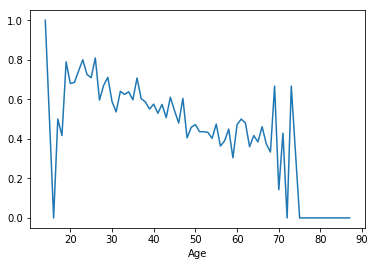

In [40]:
#Ploting relationship between age and heroin mean
drug.groupby('Age').Heroin.mean().plot()

In [41]:
#grouping year and heroin count
drug.groupby('Year').Heroin.count()

Year
2012    351
2013    490
2014    554
2015    719
2016    916
Name: Heroin, dtype: int64

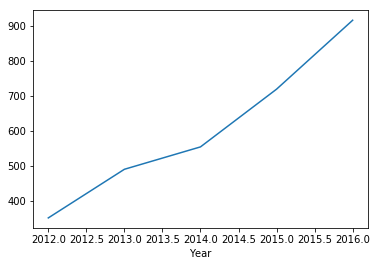

In [42]:
#Ploting year and heroin count
drug.groupby('Year').Heroin.count().plot()

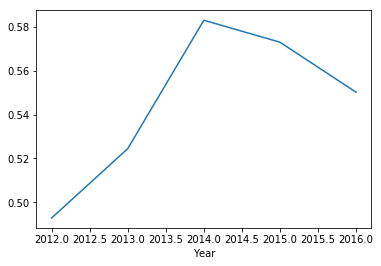

In [43]:
# Ploting year and heroin mean
drug.groupby('Year').Heroin.mean().plot()

In [44]:
#grouping age and heroin count
drug.groupby('Age').Heroin.count()

Age
14     1
16     1
17     6
18    12
19    19
20    25
21    35
22    47
23    45
24    62
25    62
26    84
27    57
28    85
29    90
30    73
31    69
32    64
33    80
34    69
35    82
36    65
37    63
38    63
39    69
40    66
41    68
42    54
43    71
44    95
      ..
47    81
48    84
49    96
50    89
51    94
52    78
53    67
54    82
55    78
56    66
57    59
58    69
59    46
60    36
61    32
62    25
63    25
64    12
65    13
66    13
67     8
68     6
69     3
70     7
71     7
72     7
73     3
75     2
81     1
87     1
Name: Heroin, Length: 62, dtype: int64

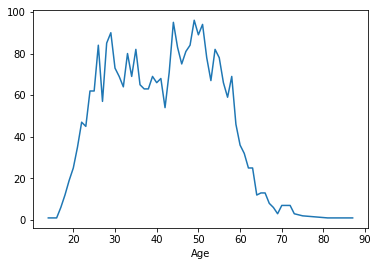

In [45]:
# Ploting year and heroin mean
drug.groupby('Age').Heroin.count().plot()

In [46]:
# Display county by heroin count
drug.groupby('County').Heroin.count()

County
Fairfield     490
Haddam         40
Hartford      898
Litchfield    174
Middletown     89
New Haven     846
New London    310
Tolland        87
Windham        96
Name: Heroin, dtype: int64

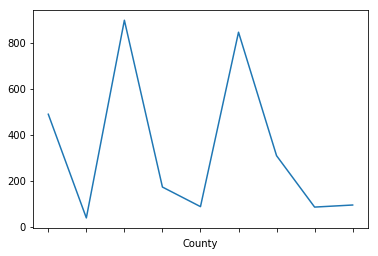

In [47]:
# Display county by heroin count
drug.groupby('County').Heroin.count().plot()

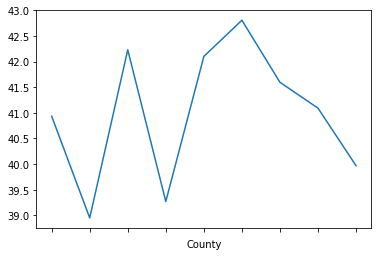

In [48]:
# Display county by Age count
drug.groupby('County').Age.mean().plot()

In [49]:
#Reading the data
dfN = spark.read.csv('Datasets/AccidentalDrugRelatedDeathsFinals.csv',header=True,inferSchema=True)

In [50]:
# Import the relevant packages.
from pyspark.sql import SparkSession
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,StringIndexer, OneHotEncoder)
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [51]:
# dropping missing values and assigning a new dataframe
print("Total data points:", dfN.count())
df=dfN.dropna()
print("Total data points:", df.count())

Total data points: 3041
Total data points: 3030


In [52]:
# Visualizing the data structure at a high level 
df.printSchema()

# Displaying first two rows
print(df.head(2))

root
 |-- CaseNumber: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- age_group: string (nullable = true)
 |-- County: string (nullable = true)
 |-- Heroin: integer (nullable = true)
 |-- Cocaine: integer (nullable = true)
 |-- Fentanyl: integer (nullable = true)
 |-- Ox1codone: integer (nullable = true)
 |-- Ox1morphone: integer (nullable = true)
 |-- EtOH: integer (nullable = true)
 |-- H1drocodone: integer (nullable = true)
 |-- Benzodiazepine: integer (nullable = true)
 |-- Methadone: integer (nullable = true)
 |-- Amphet: integer (nullable = true)
 |-- Tramad: integer (nullable = true)
 |-- Morphine : integer (nullable = true)

[Row(CaseNumber='13-16336', Date='11/9/2013', Year=2013, Gender='Female', Race='White', Age=53, age_group='Seniors', County='New London', Heroin=0, Cocaine=0, Fentanyl=0, Ox1codone=1, Ox1morphon

In [53]:
#selecting the relevant features. 

df = df.select('Year', 'Gender', 'Race', 'Age', 'age_group', 'County', 'Heroin')
df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- age_group: string (nullable = true)
 |-- County: string (nullable = true)
 |-- Heroin: integer (nullable = true)



In [54]:
# Using a for loop to find all columns that belong to the integer data type. 
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']

# Selecting the numeric features, generating summary statistics, and converting to a Pandas DataFrame.
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year,3030,2014.4485148514852,1.3678702804975316,2012,2016
Age,3030,41.795709570957094,12.328031925398939,14,87
Heroin,3030,0.5508250825082508,0.4974922046215441,0,1


In [55]:
# First creating a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.

gender_indexer = StringIndexer(inputCol='Gender',outputCol='genderIndex')
race_indexer = StringIndexer(inputCol='Race',outputCol='raceIndex')
agegroup_indexer = StringIndexer(inputCol='age_group',outputCol='agegroupIndex')
county_indexer = StringIndexer(inputCol='County',outputCol='countyIndex')
year_indexer = StringIndexer(inputCol='Year',outputCol='yearIndex')
age_indexer = StringIndexer(inputCol='Age',outputCol='ageIndex')
heroin_indexer = StringIndexer(inputCol='Heroin',outputCol='label')

# Then one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when having multiple classes.
gender_encoder = OneHotEncoder(inputCol='genderIndex',outputCol='genderVec')
race_encoder = OneHotEncoder(inputCol='raceIndex',outputCol='raceVec')
agegroup_encoder = OneHotEncoder(inputCol='agegroupIndex',outputCol='agegroupVec')
county_encoder = OneHotEncoder(inputCol='countyIndex',outputCol='countyVec')
year_encoder = StringIndexer(inputCol='yearIndex',outputCol='yearVec')
age_encoder = StringIndexer(inputCol='ageIndex',outputCol='ageVec')
label_encoder = StringIndexer(inputCol='label',outputCol='label')


# And finally, using vector assembler to turn all of the columns into one column (named features).
assembler = VectorAssembler(inputCols=['genderVec','raceVec','agegroupVec','countyVec','yearVec','ageVec'], outputCol="features")

In [56]:
from pyspark.ml import Pipeline

# Then creating a pipeline
pipeline = Pipeline(stages=[gender_indexer, race_indexer, agegroup_indexer, county_indexer, year_indexer,age_indexer,
                            heroin_indexer, gender_encoder, race_encoder, agegroup_encoder,county_encoder, year_encoder,
                            age_encoder,assembler])

# Applying pipeline into a DataFrame.
pipeline_model = pipeline.fit(df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(df)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [57]:
pipe_df.describe()

DataFrame[summary: string, label: string]

In [74]:
# Importing logistic Regression 
from pyspark.ml.classification import LogisticRegression

#Selecting the split for train data and test data
train_data, test_data = pipe_df.randomSplit([0.8,0.2])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 2425
Test Dataset Count: 605


In [75]:
#Assigning a variable and calling the logistic regression
lr = LogisticRegression(labelCol = 'label', featuresCol = 'features', maxIter=10)

#fitting and training the lr model
lrModel = lr.fit(train_data)

In [76]:
#Creating a prediction and assigning the ir model test data
predictions = lrModel.transform(test_data)


#Displaying the 1 row of the predicted values
predictions.take(1)

[Row(label=0.0, features=SparseVector(20, {0: 1.0, 1: 1.0, 6: 1.0, 10: 1.0}), rawPrediction=DenseVector([0.7182, -0.7182]), probability=DenseVector([0.6722, 0.3278]), prediction=0.0)]

In [77]:
predictions.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [78]:
selected = predictions.select("label", "prediction", "probability")
display(selected)

DataFrame[label: double, prediction: double, probability: vector]

In [79]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [80]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

Test set accuracy = 0.6181818181818182


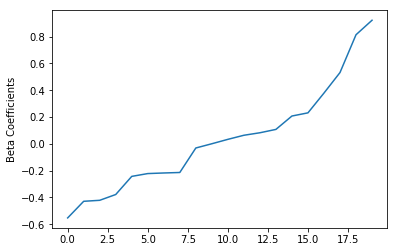

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lrModel.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

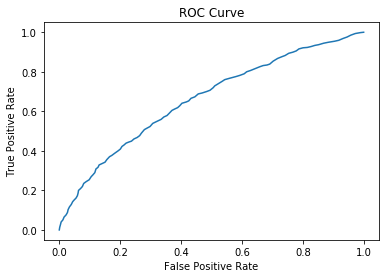

Area Under the Curve: 0.659803455872229


In [82]:
# Let's get a summary of the data.
training_summary = lrModel.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

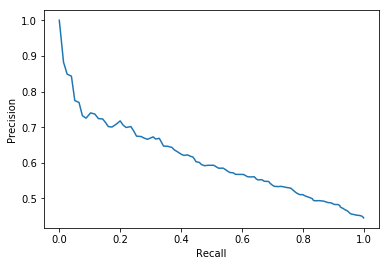

In [83]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [84]:
#Importing NaiveBayes 
from pyspark.ml.classification import NaiveBayes

#Importing MulticlassClassificationEvaluato
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [85]:
# creating the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

In [86]:
# training the model
nbmodel = nb.fit(train_data)

In [87]:
# selecting example rows to display.
predictions = nbmodel.transform(test_data)

predictions.take(1)
#predictions.show()

[Row(label=0.0, features=SparseVector(20, {0: 1.0, 1: 1.0, 6: 1.0, 10: 1.0}), rawPrediction=DenseVector([-15.6154, -16.2316]), probability=DenseVector([0.6494, 0.3506]), prediction=0.0)]

In [88]:
# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

Test set accuracy = 0.5933884297520661


In [73]:
#Evaluate the ROC
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5204270186335394
